In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("Breast Cancer Dataset.csv")

In [5]:
pd.set_option('display.max_columns', None)

In [9]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
data.shape

(569, 32)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [15]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [17]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [21]:
df = data.drop(['id'], axis=1)

In [23]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave_points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [27]:
X = df.drop('diagnosis', axis=1) # Drop the 'diagnosis' column (target)
y = df['diagnosis']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:

model = DecisionTreeClassifier(criterion='entropy') #criteria = gini, entropy
model.fit(X_train, y_train)
model

DecisionTreeClassifier(criterion='entropy')

In [35]:
import math
# Function to calculate entropy
def entropy(column):
    counts = column.value_counts()
    probabilities = counts / len(column)
    return -sum(probabilities * probabilities.apply(math.log2))
# Function to calculate conditional entropy
def conditional_entropy(data, X, target):
    feature_values = data[X].unique() # Corrected: use .unique() on the series
    weighted_entropy = 0
    for value in feature_values:
        subset = data[data[feature] == value]
        weighted_entropy += (len(subset) / len(data)) * entropy(subset[target])
    return weighted_entropy
# Function to calculate information gain
def information_gain(data, X, target):
    total_entropy = entropy(data[target])
    feature_conditional_entropy = conditional_entropy(data, X, target)
    return total_entropy - feature_conditional_entropy
# Calculate information gain for each feature
for feature in X:
    ig = information_gain(df,feature,'diagnosis')
    print(f"Information Gain for {feature}: {ig}")

Information Gain for radius_mean: 0.8607815854835991
Information Gain for texture_mean: 0.8357118798482908
Information Gain for perimeter_mean: 0.9267038614138748
Information Gain for area_mean: 0.9280305529818247
Information Gain for smoothness_mean: 0.7761788341876101
Information Gain for compactness_mean: 0.9091291689709926
Information Gain for concavity_mean: 0.9350604299589776
Information Gain for concave_points_mean: 0.9420903069361305
Information Gain for symmetry_mean: 0.735036638169654
Information Gain for fractal_dimension_mean: 0.8361770160635639
Information Gain for radius_se: 0.9337337383910278
Information Gain for texture_se: 0.8642965239721755
Information Gain for perimeter_se: 0.9315454914704012
Information Gain for area_se: 0.925377169845925
Information Gain for smoothness_se: 0.9350604299589776
Information Gain for compactness_se: 0.9231889229252984
Information Gain for concavity_se: 0.9280305529818247
Information Gain for concave_points_se: 0.8585933385629725
Informa

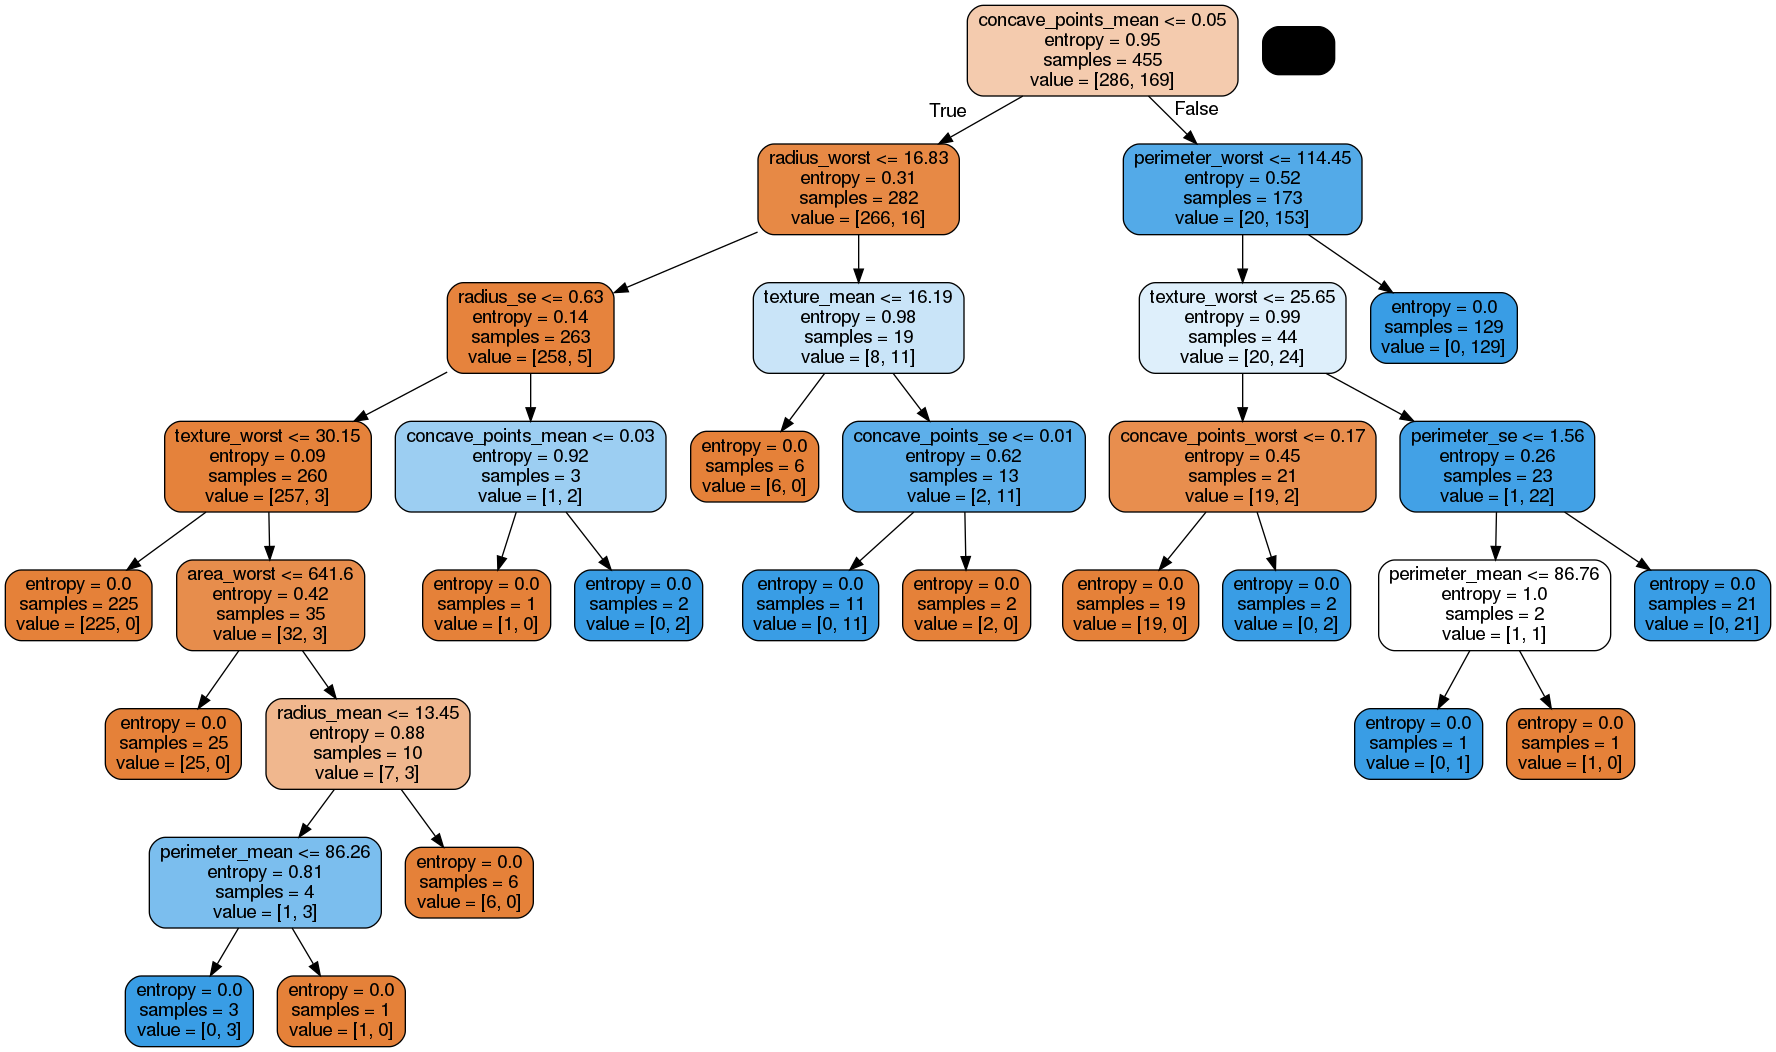

In [37]:

# Export the tree to DOT format
dot_data = export_graphviz(model, out_file=None,
feature_names=X_train.columns,
rounded=True, proportion=False,
precision=2, filled=True)
# Convert DOT data to a graph
graph = pydotplus.graph_from_dot_data(dot_data)
# Display the graph
Image(graph.create_png())

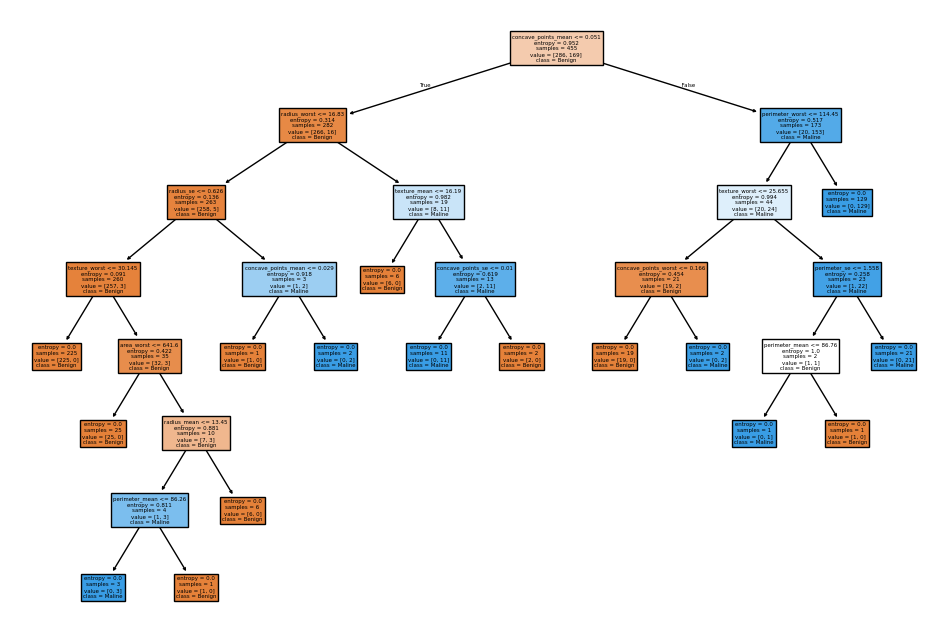

In [43]:
# Visualize the Decision Tree (optional)
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Benign', 'Maline'])
plt.show()

In [45]:
# Visualize the Decision Tree (optional)

y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [47]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) * 100
classification_rep = classification_report(y_test, y_pred)
# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 94.73684210526315
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [49]:
df.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [51]:
new = [[12.5, 19.2, 80.0, 500.0, 0.085, 0.1, 0.05, 0.02, 0.17, 0.06,
0.4, 1.0, 2.5, 40.0, 0.006, 0.02, 0.03, 0.01, 0.02, 0.003,
16.0, 25.0, 105.0, 900.0, 0.13, 0.25, 0.28, 0.12, 0.29, 0.08]]
y_pred = model.predict(new)
# Output the prediction (0 = Benign, 1 = Malignant)
if y_pred[0] == 0:
    print("Prediction: Benign")
else:
    print("Prediction: Malignant")

Prediction: Benign
